In [1]:
%matplotlib inline
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import datetime 
import os

In [2]:
train_x = pd.read_csv(os.path.join('data', 'train_x_sep.csv'))
train_y = pd.read_csv(os.path.join('data', 'train_y.csv'))

test_x = pd.read_csv(os.path.join('data', 'test_x_sep.csv'))
test_y = pd.read_csv(os.path.join('data', 'test_y.csv'))

In [3]:
versions = []
alphas = [2*(i+1) for i in range(100)]
alphas.insert(0,0)
for a in tqdm(alphas):
    la = Lasso(normalize=True, alpha=a)
    la.fit(train_x, train_y)
    versions.append(la)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.658971956948278e+17, tolerance: 180464107972224.78
  positive)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.419673868335936e+16, tolerance: 180464107972224.78
  positive)
/usr/local/anaconda3/lib/python3.

## Metrics

In [4]:
l1 = []
l2 = []
r2 = []
for model in versions:
    predictions = model.predict(test_x)
    l1.append(mean_absolute_error(test_y, predictions))
    l2.append(mean_squared_error(test_y, predictions))
    r2.append(r2_score(test_y, predictions))

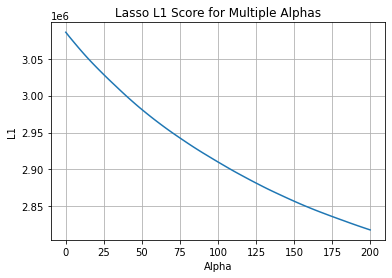

In [5]:
fig, ax = plt.subplots()
ax.plot(alphas, l1)

ax.set(xlabel='Alpha', ylabel='L1',title='Lasso L1 Score for Multiple Alphas')
ax.grid()
plt.show()

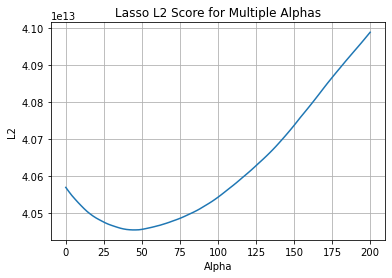

In [6]:
fig, ax = plt.subplots()
ax.plot(alphas, l2)

ax.set(xlabel='Alpha', ylabel='L2',title='Lasso L2 Score for Multiple Alphas')
ax.grid()
plt.show()

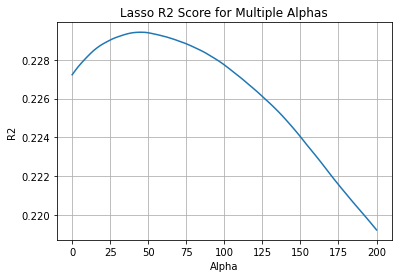

In [7]:
fig, ax = plt.subplots()
ax.plot(alphas, r2)

ax.set(xlabel='Alpha', ylabel='R2',title='Lasso R2 Score for Multiple Alphas')
ax.grid()
plt.show()

## Important Features

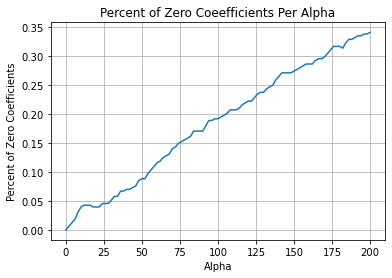

In [22]:
num_zeroes = [(len(model.coef_)-np.count_nonzero(model.coef_))/len(model.coef_) for model in versions]

fig, ax = plt.subplots()
ax.plot(alphas, num_zeroes)

ax.set(xlabel='Alpha', ylabel='Percent of Zero Coefficients',title='Percent of Zero Coeefficients Per Alpha')
ax.grid()
plt.show()

## Important Features

In [5]:
def get_non_zero_indexes(a):
    indexes = []
    for i, val in enumerate(a):
        if val != 0:
            indexes.append(i)
            
    return indexes

### First Most Important Feature

In [6]:
la = Lasso(normalize=True, alpha=6000)
la.fit(train_x, train_y)
indexes = get_non_zero_indexes(la.coef_)

In [7]:
train_x.columns[indexes[0]]

'category_id_10.0'

Category 10 links to the category "Music" which means music, according to LASSO, has the largest affect on predicting expected view count.

### Two-Most Important Features

In [8]:
la = Lasso(normalize=True, alpha=5500)
la.fit(train_x, train_y)
indexes = get_non_zero_indexes(la.coef_)

In [9]:
print(f'Feature 1: {train_x.columns[indexes[0]]}')
print(f'Feature 2: {train_x.columns[indexes[1]]}')

Feature 1: category_id_10.0
Feature 2: title81


Again music is an important feature. Feature two is associated with word encodings 50 which links to the word 'as'.

### Three-Most Important Features

In [19]:
la = Lasso(normalize=True, alpha=5200)
la.fit(train_x, train_y)
indexes = get_non_zero_indexes(la.coef_)

In [20]:
indexes

[7, 272, 320]

In [24]:
print(f'Feature 1: {train_x.columns[indexes[0]]}, {la.coef_[indexes[0]]}')
print(f'Feature 2: {train_x.columns[indexes[1]]}, {la.coef_[indexes[1]]}')
print(f'Feature 3: {train_x.columns[indexes[2]]}, {la.coef_[indexes[2]]}')

Feature 1: category_id_10.0, 1984719.7850706752
Feature 2: title81, 93746.95615655258
Feature 3: title97, -12259.305509731223
